In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv('our_dataframe.csv', index_col=0)

In [3]:
df.columns

Index(['saleprice', 'sqfttotliving', 'yrbuilt', 'yrrenovated', 'bedrooms',
       'zipcode', 'sqfttotbasement', 'sqftfinbasement', 'sqftopenporch',
       'sqftenclosedporch', 'sqftdeck', 'heatsystem', 'heatsource',
       'bathhalfcount', 'bath3qtrcount', 'bathfullcount', 'condition',
       'viewutilization', 'sqftgarageattached', 'daylightbasement',
       'finbasementgrade', 'hbuasifvacant', 'inadequateparking', 'mtrainier',
       'olympics', 'cascades', 'territorial', 'seattleskyline', 'pugetsound',
       'lakewashington', 'lakesammamish', 'smalllakerivercreek', 'otherview',
       'wfntlocation', 'trafficnoise', 'airportnoise', 'powerlines',
       'othernuisances', 'adjacentgreenbelt'],
      dtype='object')

adding up the baths and porch squarefootage

In [4]:
df['porch'] = df['sqftopenporch']+df['sqftenclosedporch']
df['baths'] = df['bathfullcount']+(0.75*df['bath3qtrcount'])+(0.5*df['bathhalfcount'])
df

,saleprice,sqfttotliving,yrbuilt,yrrenovated,bedrooms,zipcode,sqfttotbasement,sqftfinbasement,sqftopenporch,sqftenclosedporch,...,smalllakerivercreek,otherview,wfntlocation,trafficnoise,airportnoise,powerlines,othernuisances,adjacentgreenbelt,porch,baths
0,560000,1930,1989,0,3,98019,0,0,180,0,...,0,0,0,0,0,N,N,N,180,2.00
1,435000,1975,1994,0,3,98038,0,0,45,0,...,0,0,0,0,0,N,N,N,45,2.50
2,409950,1850,1968,0,3,98058,1220,600,0,0,...,0,0,0,0,0,N,N,N,0,2.50
3,380000,1750,1963,0,4,98001,920,460,670,0,...,0,0,0,0,0,N,N,N,670,1.50
4,775000,2080,1947,0,4,98177,1040,1040,0,0,...,0,0,0,0,0,N,N,N,0,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18766,930000,2600,1948,0,3,98116,1300,1300,0,0,...,0,0,0,0,0,N,N,N,0,2.00
18767,850000,2220,1989,0,3,98029,0,0,40,0,...,0,0,0,0,0,N,N,Y,40,2.50
18768,686000,1910,1908,0,4,98144,1010,900,80,0,...,0,0,0,2,0,N,N,N,80,1.75
18769,695000,2520,2014,0,4,NaN,0,0,350,0,...,0,0,0,0,0,N,N,N,350,2.50


dropping bath-breakdown and porch types

In [5]:
df.drop(columns=['sqftopenporch', 'sqftenclosedporch', 'bathfullcount', 'bath3qtrcount', 'bathhalfcount'], inplace=True)

In [6]:
df.lakewashington.unique()

array([0, 3, 2, 4, 1])

lets see some plots

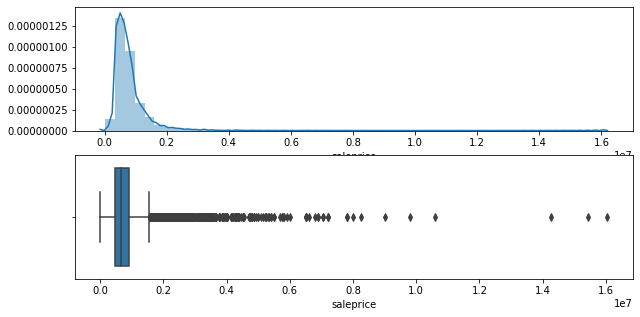

In [7]:
fig, ax = plt.subplots(2,1, figsize=(10,5))
sns.distplot(df.saleprice, ax = ax[0])
sns.boxplot(df.saleprice, ax= ax[1])

In [8]:
df.corr().loc[:, 'saleprice']

saleprice              1.000000
sqfttotliving          0.621515
yrbuilt                0.084952
yrrenovated            0.115198
bedrooms               0.271100
sqfttotbasement        0.272623
sqftfinbasement        0.291167
sqftdeck               0.208910
heatsystem             0.135627
heatsource            -0.052802
condition             -0.047447
sqftgarageattached     0.168607
finbasementgrade       0.234935
hbuasifvacant         -0.006878
inadequateparking      0.050667
mtrainier              0.074170
olympics               0.152614
cascades               0.123368
territorial            0.312686
seattleskyline         0.184895
pugetsound             0.105652
lakewashington         0.378633
lakesammamish          0.156440
smalllakerivercreek    0.041930
otherview              0.104786
wfntlocation           0.261991
trafficnoise          -0.002572
airportnoise                NaN
porch                  0.270791
baths                  0.495995
Name: saleprice, dtype: float64

choosing the highest correlation with saleprice and also choosing only the features of the property for now 
(will look into the location aspects which is the key in real estate as we progress)

`sqfttotliving` **0.621515**

`baths` **0.495995**

`porch` **0.270791**


checking for linearity between the chosen predictors

In [9]:
df_fsm = df.loc[:, ['saleprice', 'sqfttotliving', 'baths', 'porch']]
df_fsm

,saleprice,sqfttotliving,baths,porch
0,560000,1930,2.00,180
1,435000,1975,2.50,45
2,409950,1850,2.50,0
3,380000,1750,1.50,670
4,775000,2080,1.75,0
...,...,...,...,...
18766,930000,2600,2.00,0
18767,850000,2220,2.50,40
18768,686000,1910,1.75,80
18769,695000,2520,2.50,350


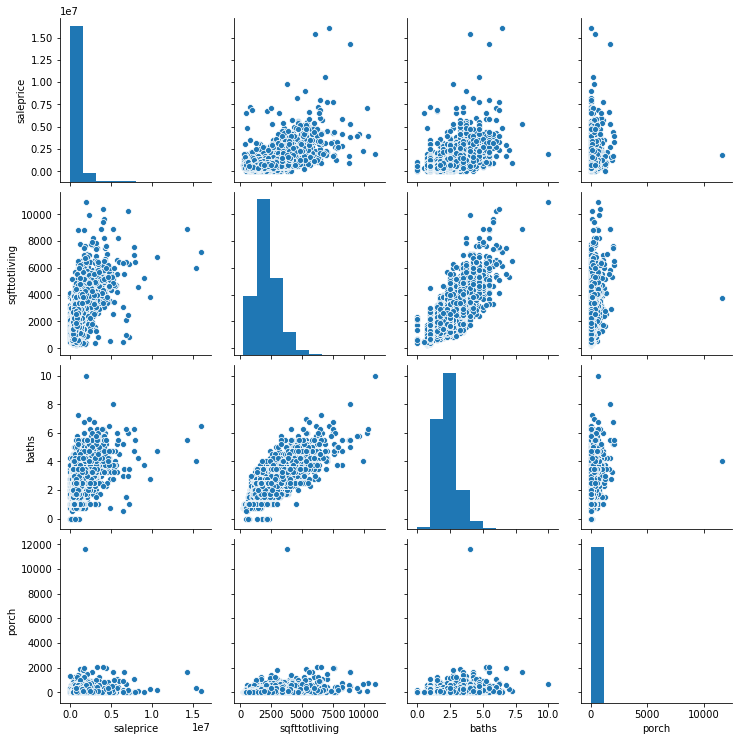

In [10]:
sns.pairplot(df_fsm);

In [11]:
formula = 'saleprice ~ sqfttotliving + baths + porch'
fsm = ols(formula=formula, data=df_fsm).fit()
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     3995.
Date:                Tue, 16 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:39:49   Log-Likelihood:            -2.7144e+05
No. Observations:               18771   AIC:                         5.429e+05
Df Residuals:                   18767   BIC:                         5.429e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.494e+04   9915.883     -2.515      0.012   -4.44e+04   -5503.107
sqfttotliving   352.9771      5.723     61.672      0.000     341.759     364.196
baths          2.045e+04   6710.573      3.047      0.002    7295.118    3.36e+04
porch           229.8631     23.375      9.834      0.000     184.046     275.680
==============================================================================
Omnibus:                    24122.242   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12517705.680
Skew:                           6.734   Prob(JB):                         0.00
Kurtosis:                     128.791   Cond. No.                     7.58e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
print('R-squared of our fsm', fsm.rsquared)
print('Beta values of our fsm', fsm.params)

R-squared of our fsm 0.3897180563588202
Beta values of our fsm Intercept       -24939.132950
sqfttotliving      352.977132
baths            20448.448360
porch              229.863062
dtype: float64


In [13]:
residuals = fsm.resid

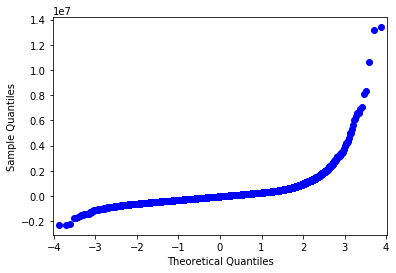

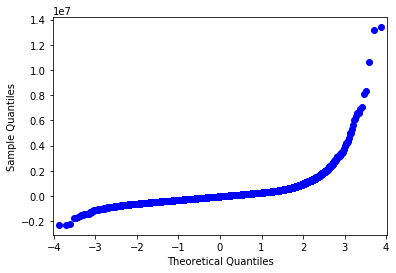

In [14]:
sm.qqplot(residuals)

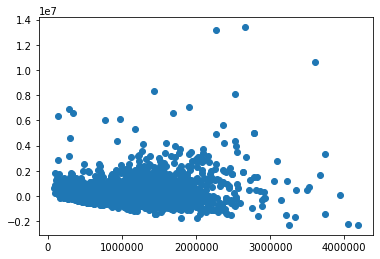

In [15]:
predictions = fsm.predict()
fig, ax = plt.subplots()
ax.scatter(predictions, residuals)